0.01768388256576615


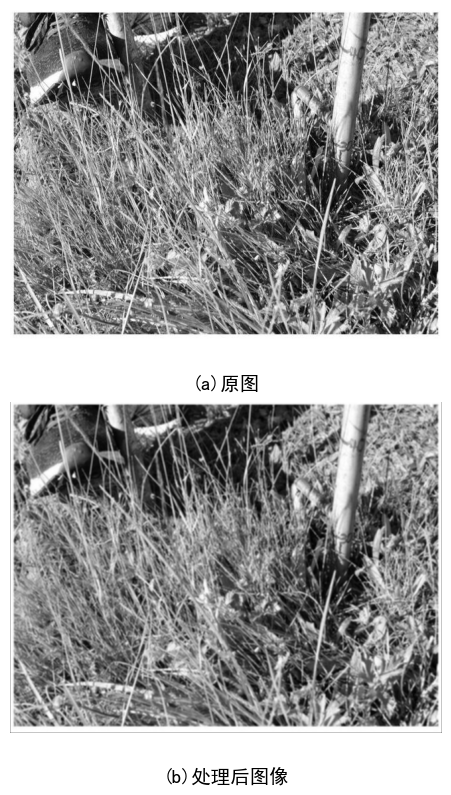

In [22]:
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["SimHei"]

def load_image(image_path):
    with Image.open(image_path) as img:
        img = img.convert('L')
        return np.array(img)

def show_image(before_process_img,after_process_img):
    fig, axes = plt.subplots(2, 1, figsize=(5, 8))

    axes[0].imshow(before_process_img, cmap="gray")
    axes[1].imshow(after_process_img, cmap="gray")
    axes[0].text(0.5,-0.1,"(a)原图",transform=axes[0].transAxes,ha='center',va='top',fontsize=14)
    axes[1].text(0.5, -0.1, "(b)处理后图像", transform=axes[1].transAxes, ha="center", va="top", fontsize=14)
    axes[0].axis("off")
    axes[1].axis("off")
    
    plt.tight_layout()
    plt.show()

def multi_sum(x,y):
    sum = 0
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            sum += x[i,j] * y[i,j]
    return sum

def conv2d(x, kernel):
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    x_padded = np.pad(x, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    output = np.zeros_like(x)

    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            region = x_padded[i :i + kernel_height, j :j + kernel_width]
            output[i, j] = multi_sum(region , kernel)

    return output
    
def G_kernel(x,y,sigma):
    result = np.zeros((x,y))
    center_x,center_y = x // 2,y // 2
    temp = 1 / (2 * math.pi * (sigma ** 2))
    print(temp)
    for i in range(x):
        for j in range(y):
            result[i, j] = temp * math.exp(- ((i - center_x) ** 2 + (j - center_y) ** 2) / (2 * sigma ** 2))
    result = result / np.sum(result)
    return result

image_path = "test.jpg"
image_array = load_image(image_path)
# after_process_image = conv2d(image_array, np.ones((3, 3), np.float32) / 9)
after_process_image = conv2d(image_array, G_kernel(3,3,3))
show_image(image_array,after_process_image)



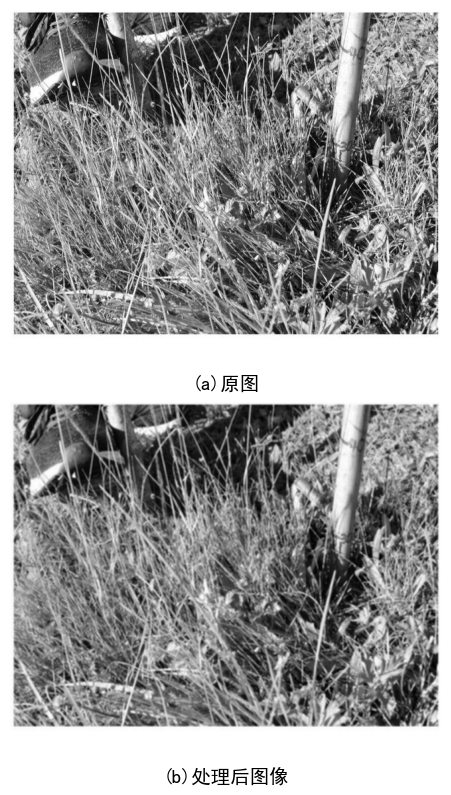

In [21]:
from scipy import ndimage
import matplotlib.pyplot as plt

img = load_image("test.jpg")

# blurred = ndimage.uniform_filter(img,3)
blurred = ndimage.gaussian_filter(img,3,radius=1)

show_image(img,blurred)


In [10]:

x = np.random.randint(1,5,(2,4))
x = np.pad(x, ((1, 1), (1, 1)))
print(x)

print(G_kernel(3,3,1))

[[0 0 0 0 0 0]
 [0 1 4 4 3 0]
 [0 2 1 3 4 0]
 [0 0 0 0 0 0]]
0.15915494309189535
[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


In [4]:
x = np.array([[1,2,3],[1,2,3]])
y = np.array([[5,5,5],[5,5,5]])
print(multi_sum(x, y))
print(np.sum(x * y))

60
60
